In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../../NewDataset.csv")

In [2]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Last Post Recent,%Post Single Day,Index of Activity,Average of Likes,Fake
0,1,0.000,2,42,1,0,0,111,688,409,1,3.000,11.111,68.300,0
1,1,0.067,2,0,0,0,0,58,353,456,1,8.621,0.800,31.121,0
2,1,0.000,0,0,0,0,0,44,535,364,1,4.545,1.417,49.750,0
3,1,0.000,2,14,0,0,1,81,3109,298,1,1.235,0.833,160.556,0
4,1,0.000,2,0,0,0,1,498,1071,1999,1,2.000,5.333,95.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,0,0.000,0.000,0.000,1
996,1,0.000,3,75,0,0,0,1,103,159,0,100.000,0.000,0.000,1
997,1,0.000,1,0,0,0,0,0,88,322,0,0.000,0.000,0.000,1
998,0,0.000,1,0,0,0,0,0,929,1315,0,0.000,0.000,0.000,1


In [3]:
X=df.iloc[:, 0:11].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0., 111., 688., 409.,   1.])

In [4]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [5]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

670 670
330 330


In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(clf.fit(X_train, y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [8]:
print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

TRAIN SET 1.0
TEST  SET 0.9636363636363636


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y.values.ravel(), cv=4)
scores

array([0.968, 0.96 , 0.96 , 0.888])

In [10]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.94 (+/- 0.06)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Real','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[159   6]
 [  6 159]]


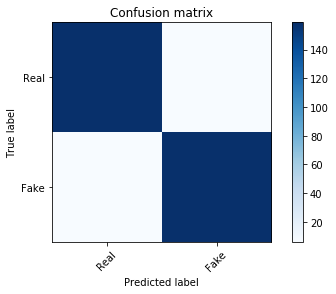

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [14]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.03636364 1.        ]
True Positive rate:  [0.         0.96363636 1.        ]


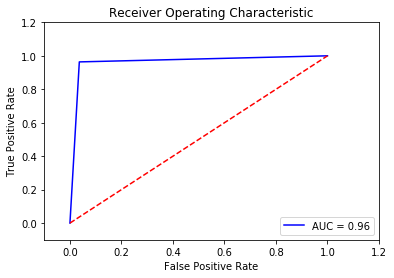

In [15]:
plot_roc_curve(y_test, clf.predict(X_test))

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       165
           1       0.96      0.96      0.96       165

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



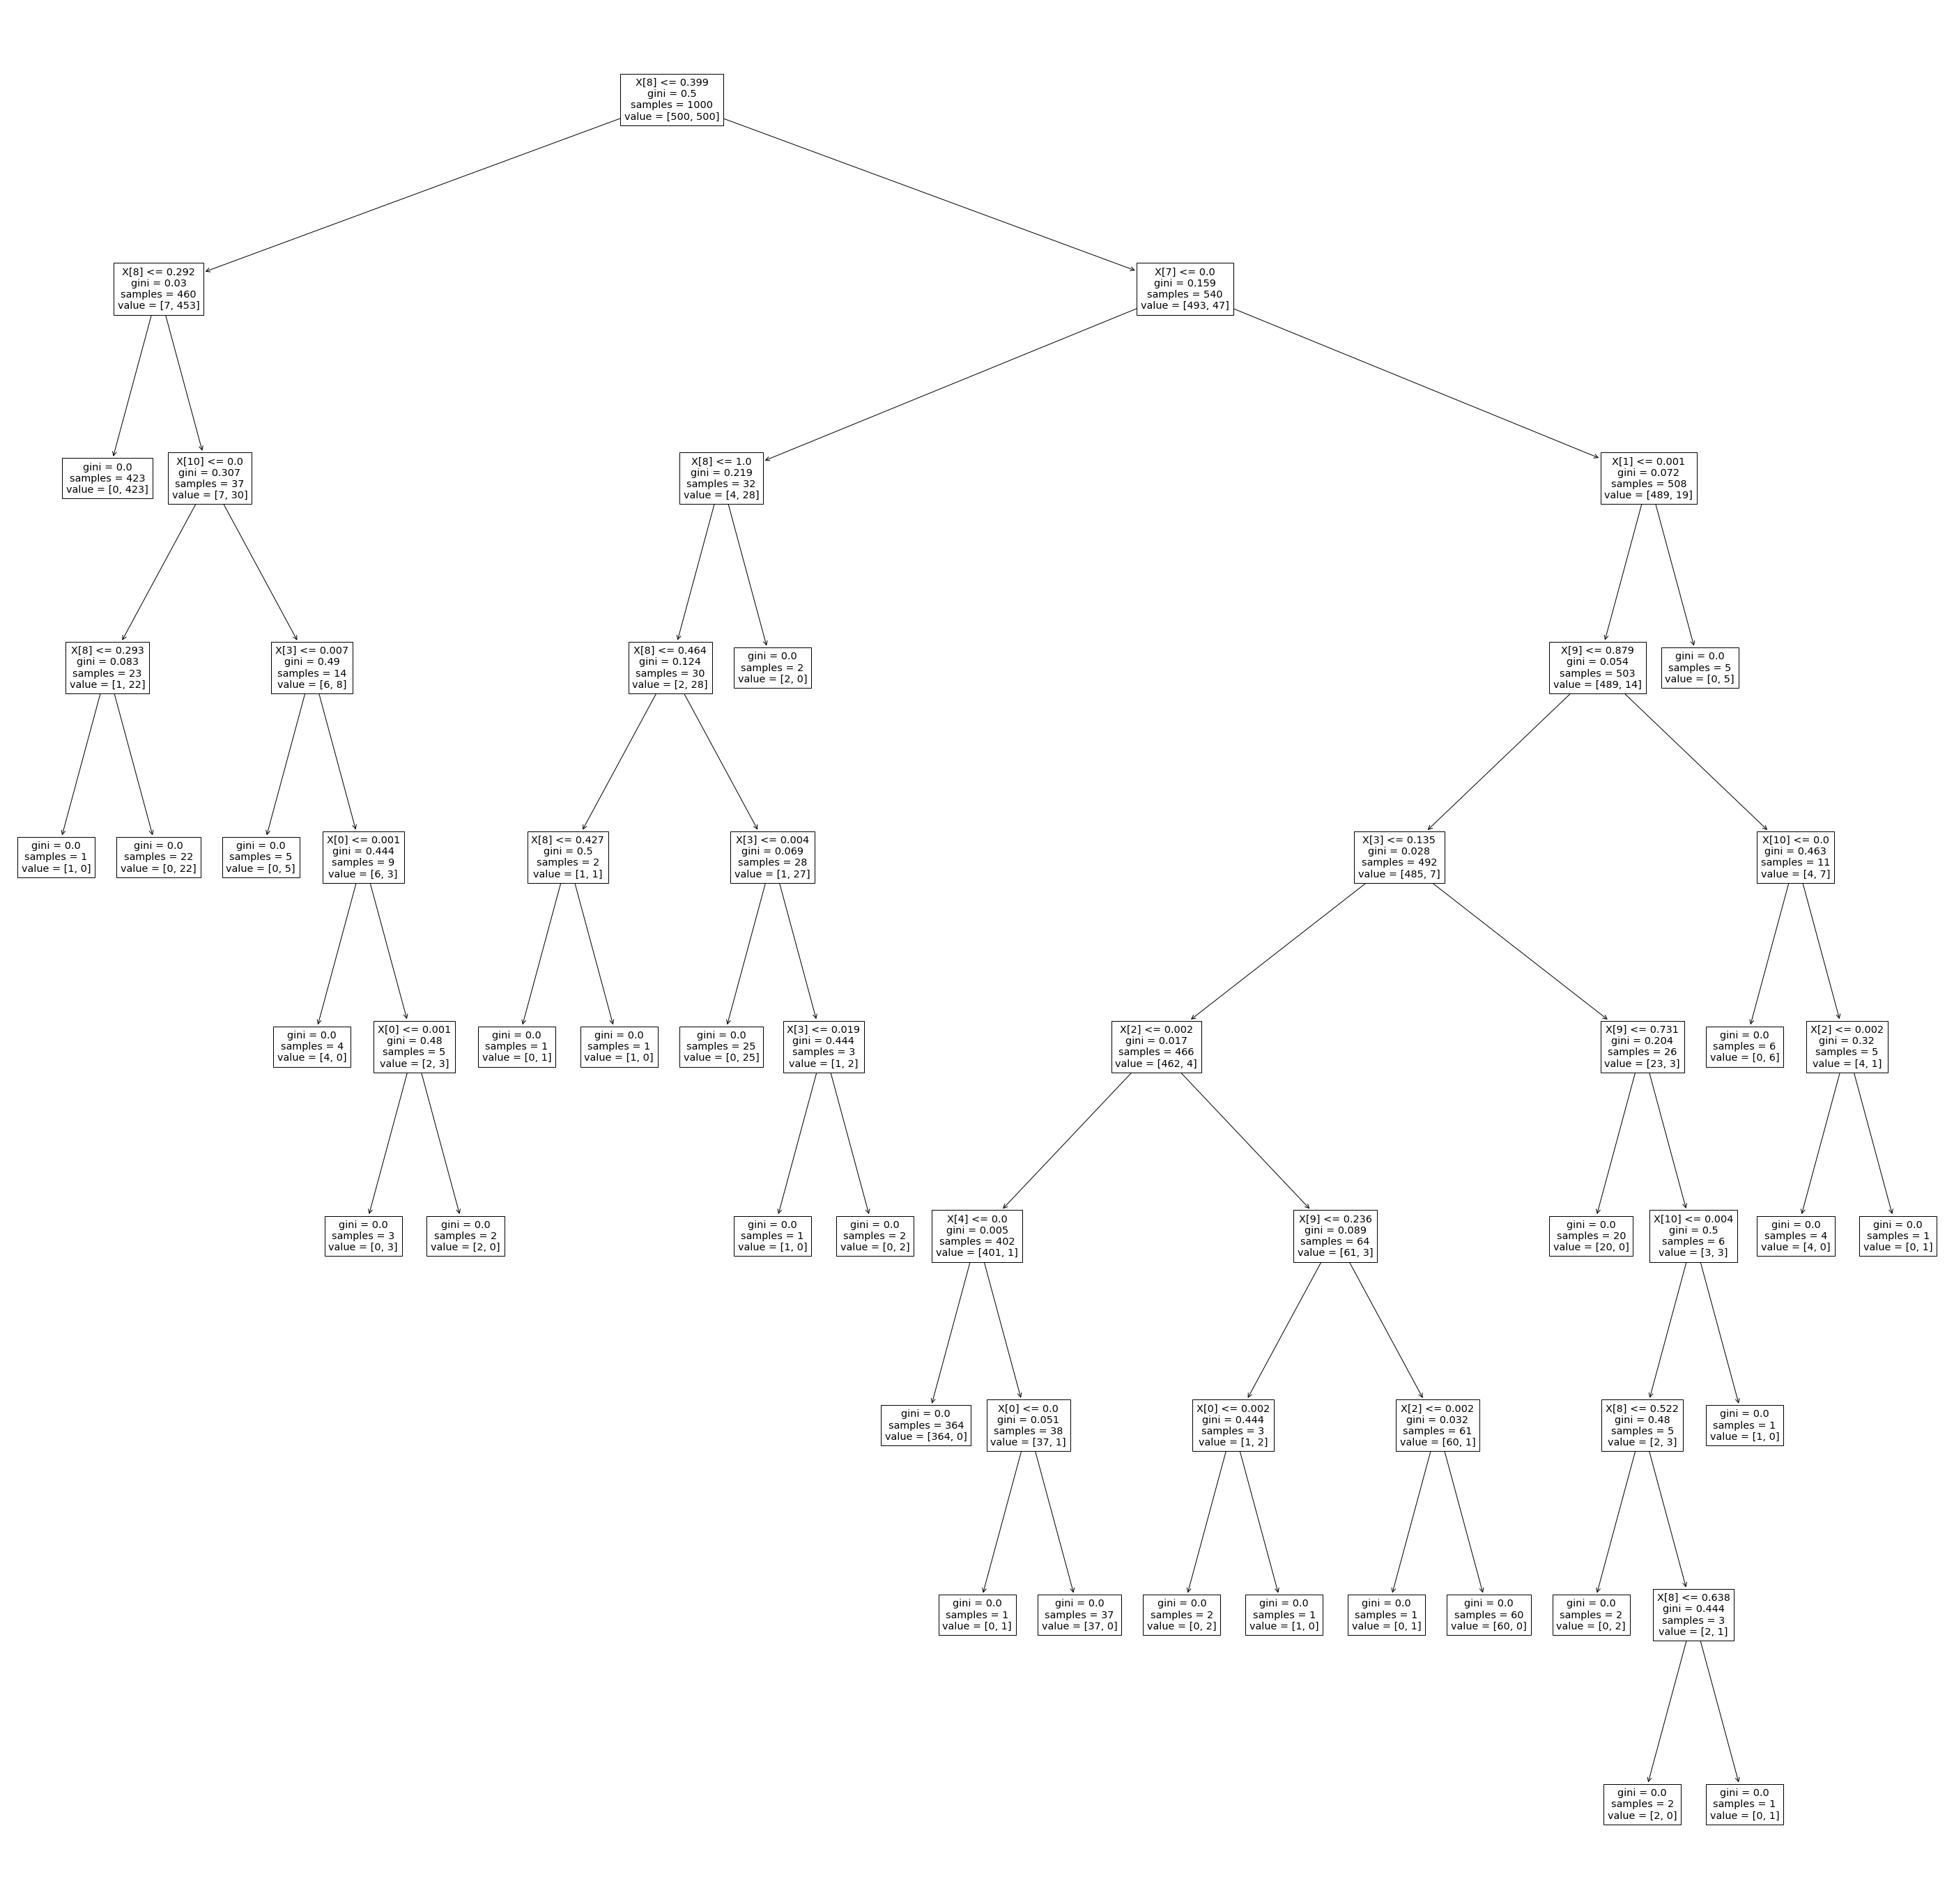

In [18]:
tree.plot_tree(clf.fit(X,y)) 
fig = clf.fit(X,y)
tree.plot_tree(fig)
plt.rcParams["figure.figsize"] = [60,60]
plt.show()